#Import Library & Data

In [1]:
## Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
## Import Data
df = pd.read_csv("E Commerce Dataset.csv")

#Explore Data

In [3]:
## Explore Data
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [4]:
df = df.dropna()

In [5]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [6]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.00000,3774.000000,3774.000000,3774.000000,3774.000000
mean,53017.994966,0.167197,8.776895,1.707737,15.743773,2.981187,3.754107,3.056439,4.216481,0.282194,15.72761,1.719661,2.825384,4.526232,164.215156
std,1608.979289,0.373201,7.678508,0.936725,8.594330,0.722158,1.025233,1.389730,2.562142,0.450127,3.62991,1.674508,2.467597,3.371310,24.089821
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.00000,0.000000,1.000000,0.000000,0.000000
25%,51656.250000,0.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.00000,1.000000,1.000000,2.000000,148.250000
50%,53160.500000,0.000000,8.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.00000,1.000000,2.000000,3.000000,160.000000
75%,54394.500000,0.000000,13.000000,3.000000,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.00000,2.000000,3.000000,7.000000,178.000000
max,55630.000000,1.000000,51.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.00000,16.000000,16.000000,46.000000,325.000000


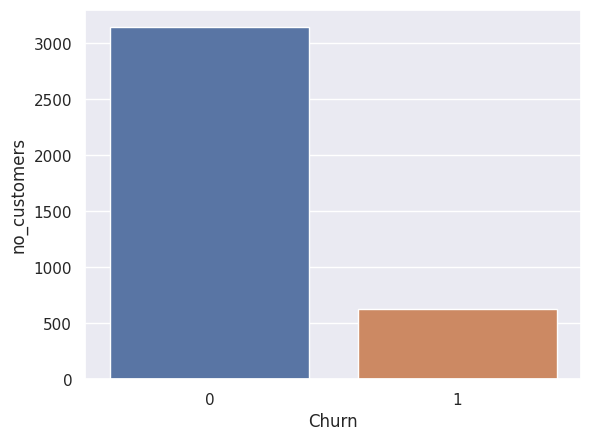

In [13]:
#Explore No. of customers by Target

df_noCust = df.groupby(by=['Churn']).agg(
          no_customers=('Churn','count')).reset_index()

sns.barplot(data=df_noCust, x='Churn', y='no_customers')
plt.show()

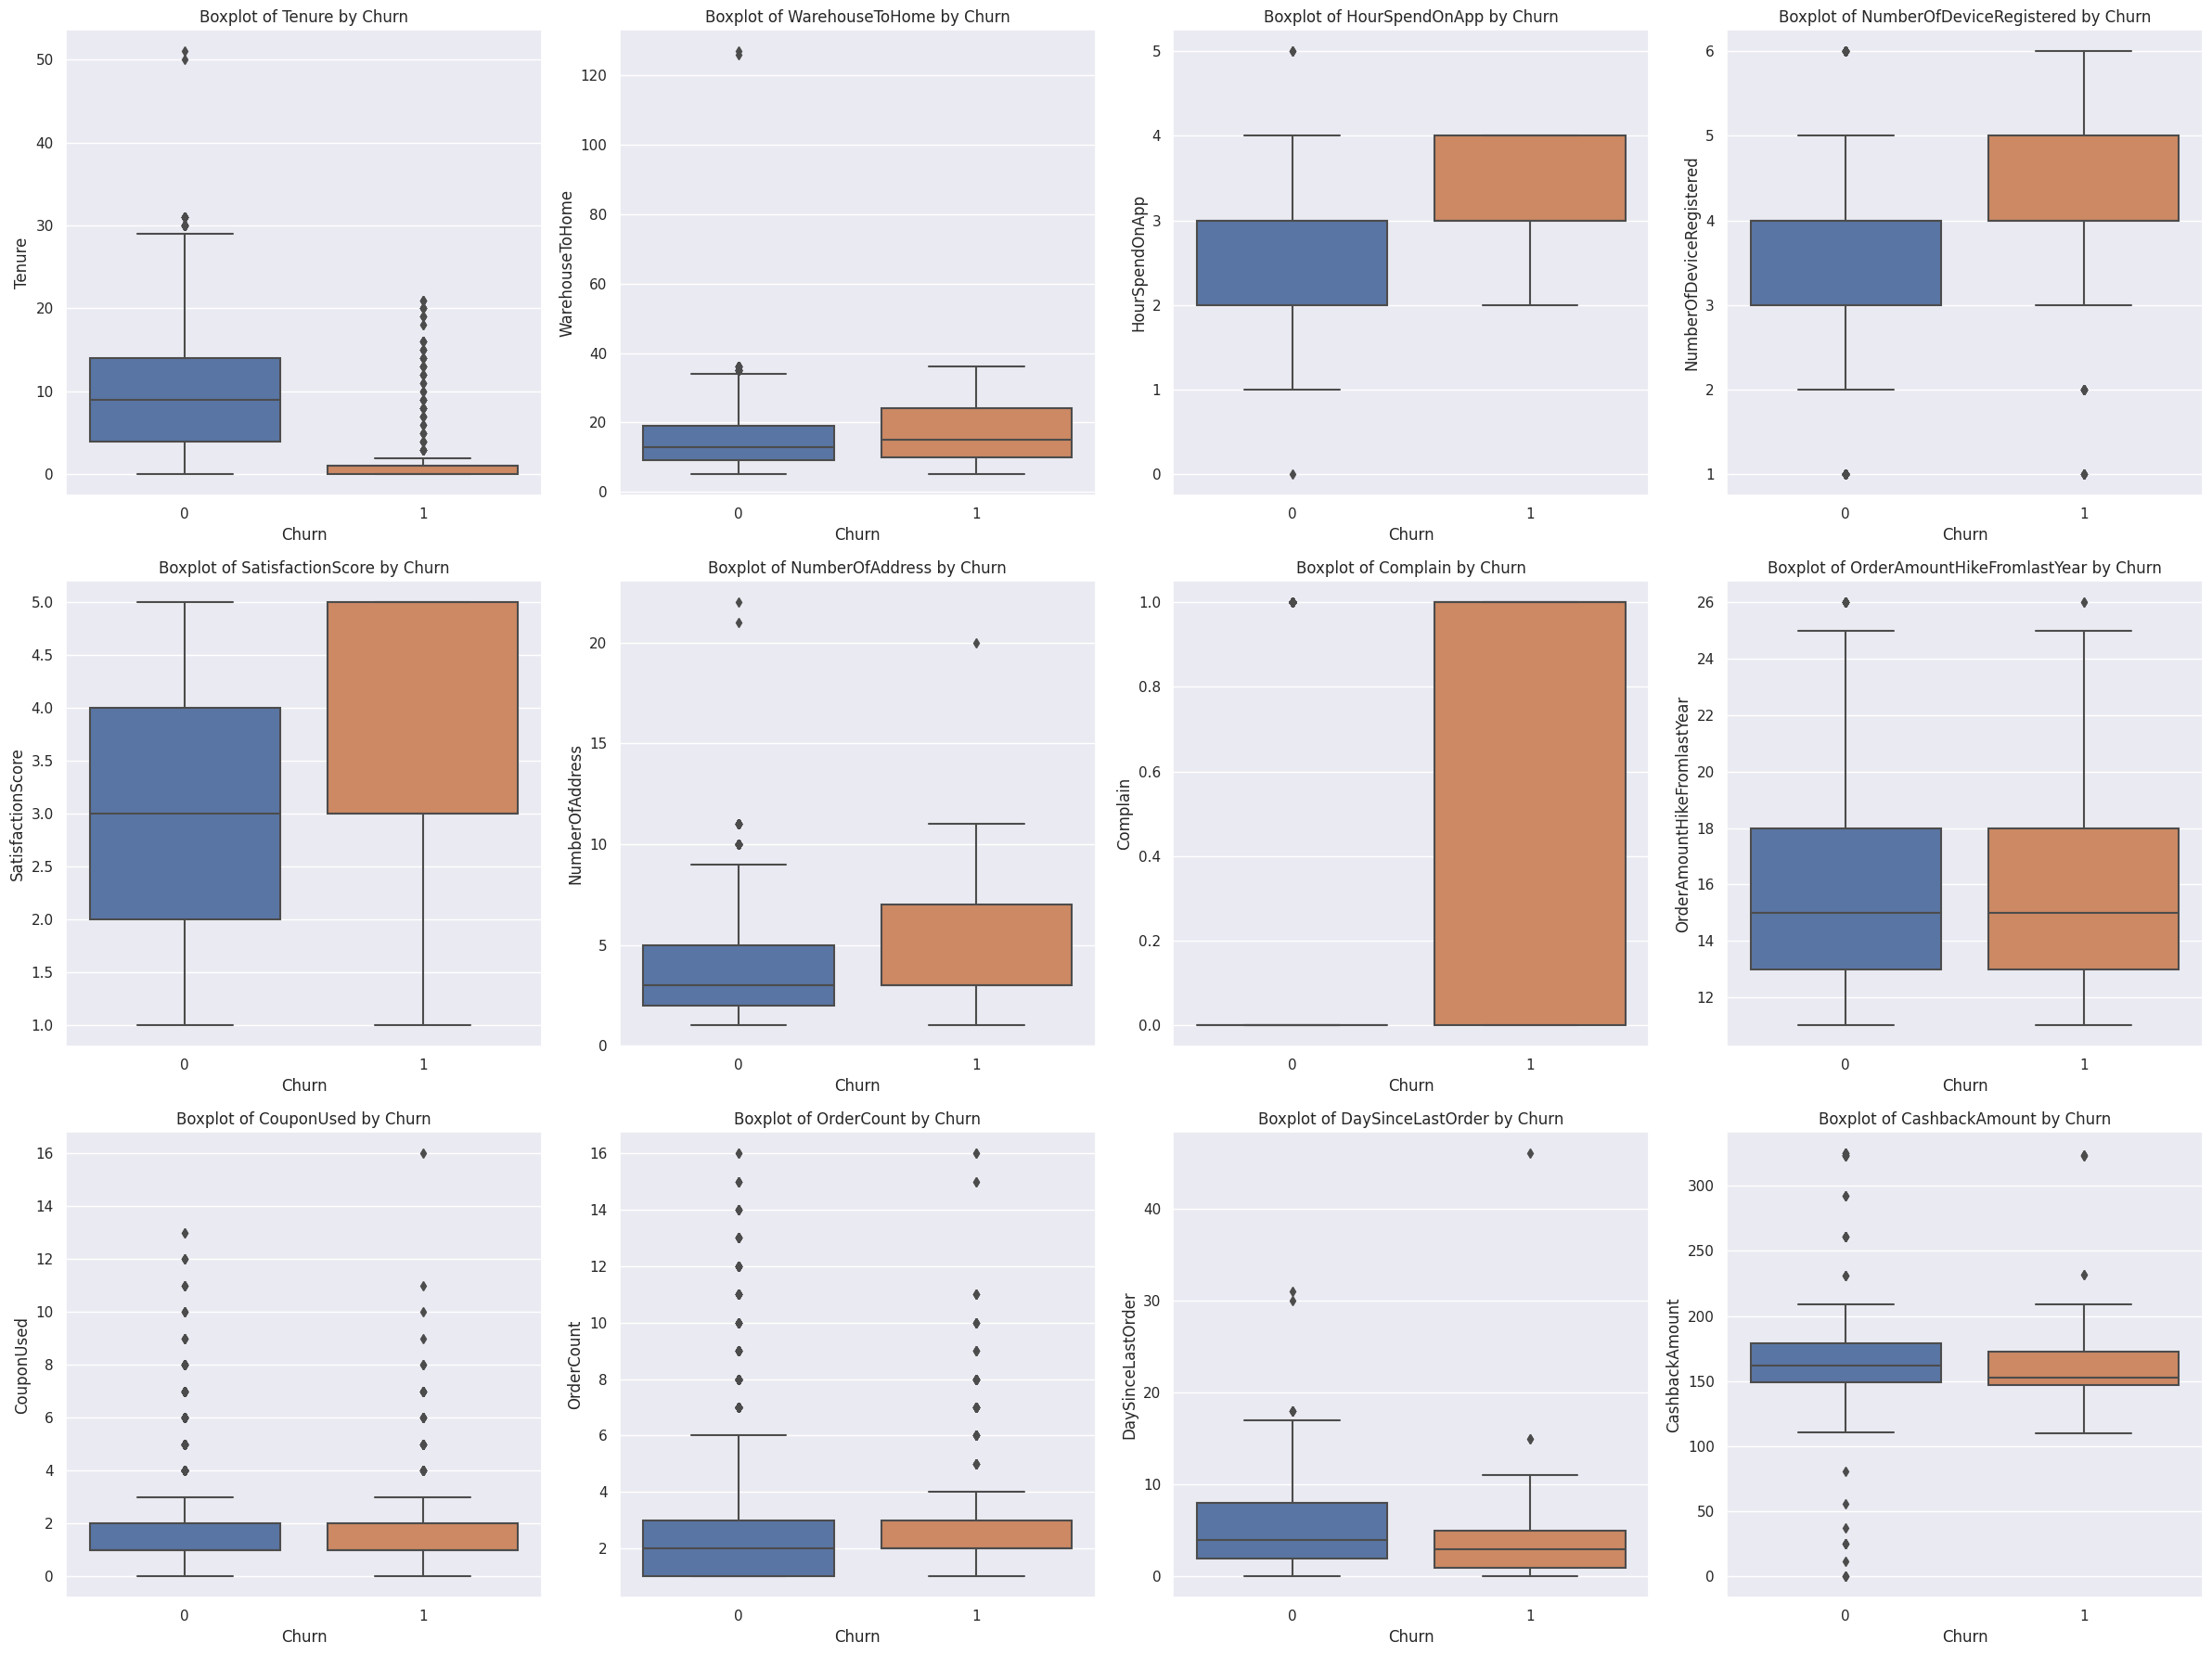

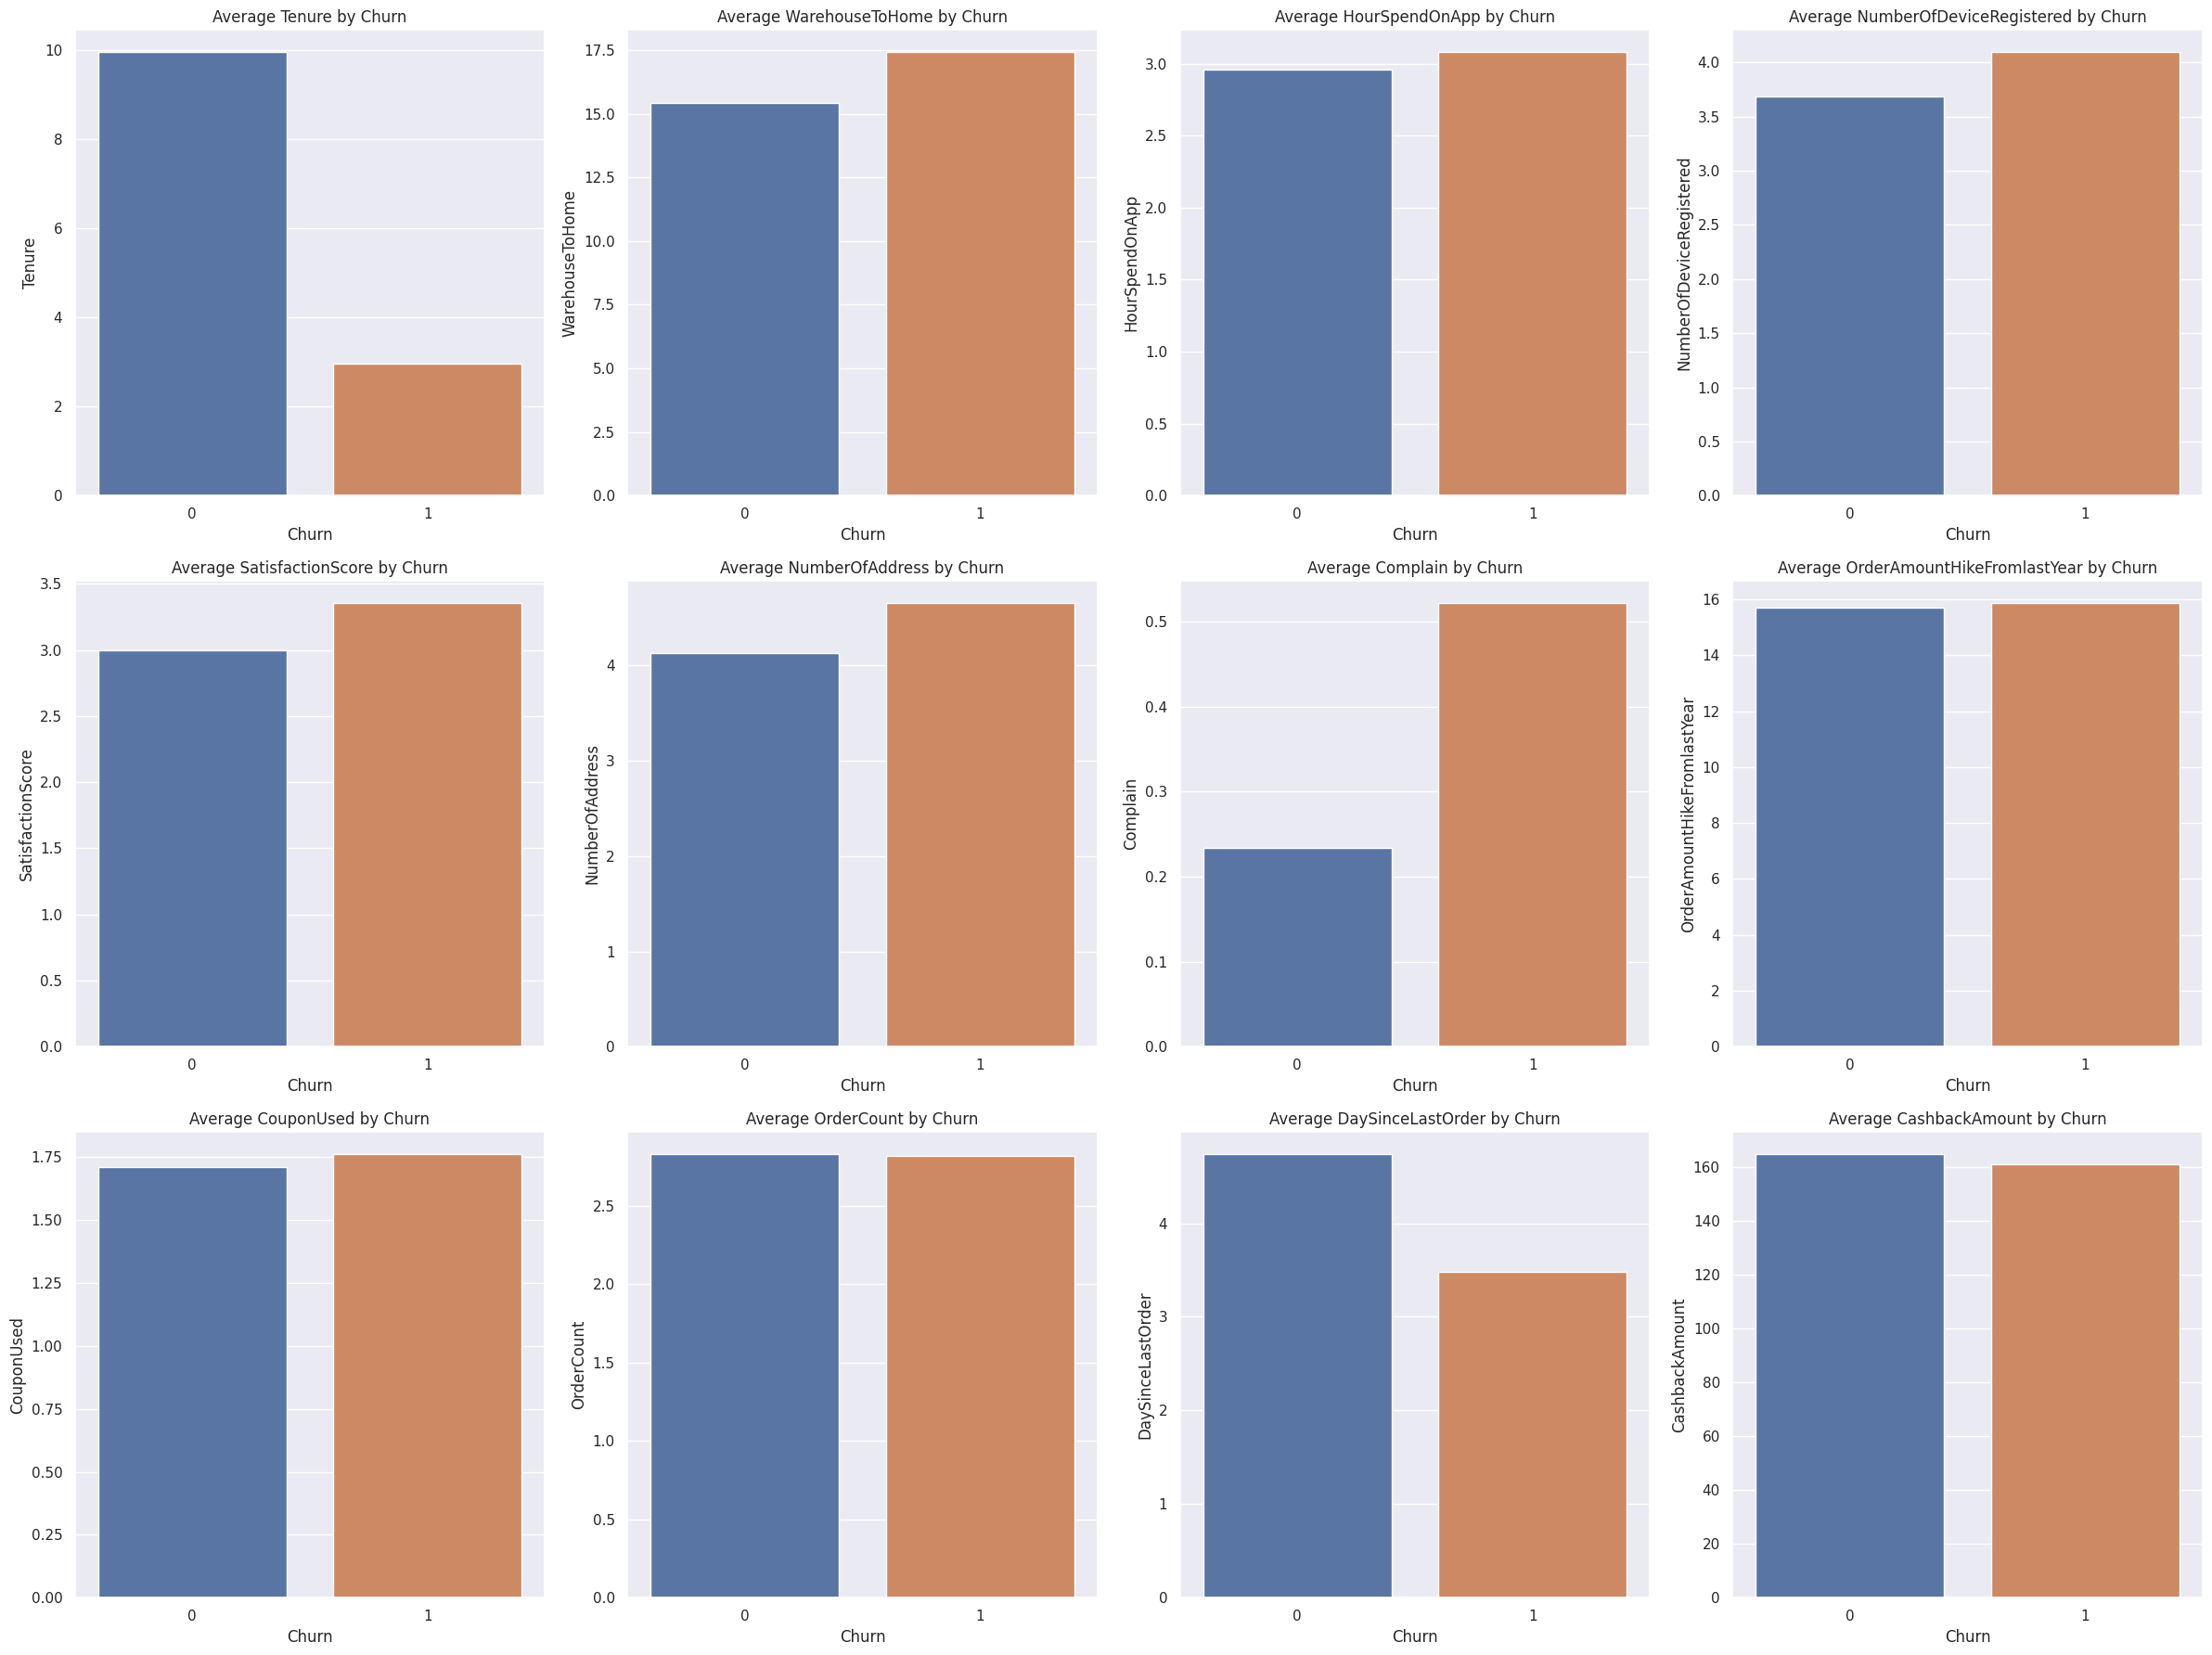

In [22]:
# List of features to explore
features_to_explore = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
                       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Create subplots for box plots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 18))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

for i, feature in enumerate(features_to_explore):
    sns.boxplot(data=df, x='Churn', y=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} by Churn')

plt.tight_layout()
plt.show()

# Group by 'Churn' and calculate the mean of each feature
df_feature_means = df.groupby(by=['Churn'])[features_to_explore].mean().reset_index()

# Create subplots for bar plots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 18))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

for i, feature in enumerate(features_to_explore):
    sns.barplot(data=df_feature_means, x='Churn', y=feature, ax=axes[i])
    axes[i].set_title(f'Average {feature} by Churn')

plt.tight_layout()
plt.show()

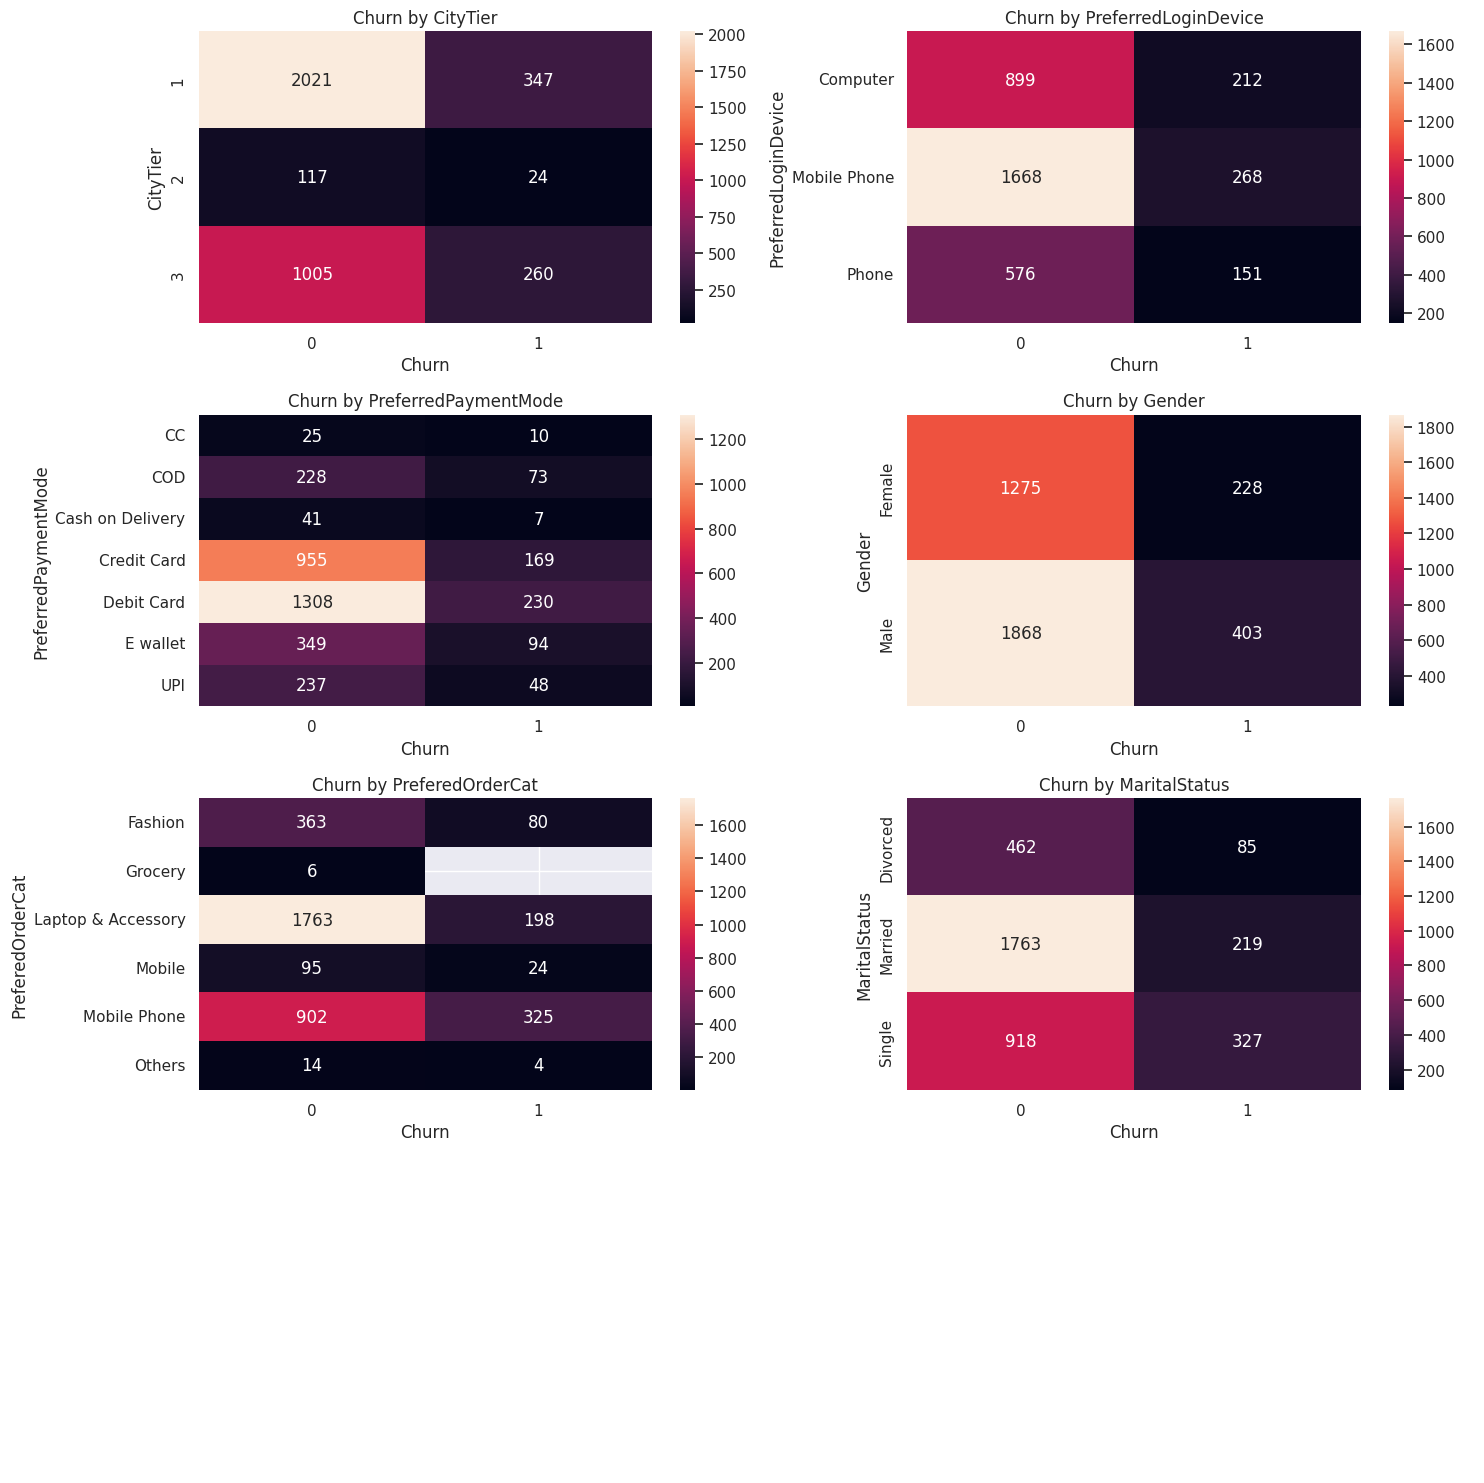

In [29]:
# List of features to explore
features = ['CityTier', 'PreferredLoginDevice', 'PreferredPaymentMode',
            'Gender', 'PreferedOrderCat', 'MaritalStatus']

# Create subplots for heatmaps
num_rows = 4
num_cols = (len(features) + num_rows - 1) // num_rows
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(features):
    df_feature = df.groupby([feature, 'Churn']).size().unstack()
    sns.heatmap(df_feature, annot=True, fmt='.0f', ax=axes[i])
    axes[i].set_title(f'Churn by {feature}')

# Hide any remaining empty subplots
for j in range(len(features), num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#Data Processing

In [50]:
features = ['CityTier', 'PreferredLoginDevice', 'PreferredPaymentMode',
            'Gender', 'PreferedOrderCat', 'MaritalStatus']

cat_data = pd.DataFrame()

cat_data = pd.concat([cat_data, pd.get_dummies(df['Gender'], prefix='Gender')], axis=1)
cat_data = pd.concat([cat_data, pd.get_dummies(df['CityTier'], prefix='CityTier')], axis=1)
cat_data = pd.concat([cat_data, pd.get_dummies(df['PreferredLoginDevice'], prefix='PreferredLoginDevice')], axis=1)
cat_data = pd.concat([cat_data, pd.get_dummies(df['PreferredPaymentMode'], prefix='PreferredPaymentMode')], axis=1)
cat_data = pd.concat([cat_data, pd.get_dummies(df['PreferedOrderCat'], prefix='PreferedOrderCat')], axis=1)
cat_data = pd.concat([cat_data, pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')], axis=1)
cat_data.reset_index(drop=True)

,Gender_Female,Gender_Male,CityTier_1,CityTier_2,CityTier_3,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_CC,PreferredPaymentMode_COD,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,1,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3770,0,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3771,0,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3772,0,1,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [31]:
X = pd.concat([df[['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
                       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']], cat_data], axis=1)
y = df['Churn']

#Model Creation and Evaluation

In [32]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [34]:
#Create Generic function to fit data and display results/predictions
def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    # fit model to training data
    clf.fit(X_train, y_train)

    # make predictions for train data
    y_pred_train = clf.predict(X_train)

    # make predictions for test data
    y_pred_test = clf.predict(X_test)
    # print evaluation
    print(classification_report(y_test, y_pred_test))
    print('\nConfusion Matrix: \n')
    s = sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu');
    s.set(xlabel='Predicted class', ylabel='True class')
    plt.show()

    fpr_train, tpr_train, _ = roc_curve(y_pred_train,  y_train)
    auc_train = roc_auc_score(y_pred_train, y_train)
    plt.plot(fpr_train,tpr_train, color='Blue', label='train: auc='+f'{auc_train:.2f}')

    fpr_test, tpr_test, _ = roc_curve(y_pred_test,  y_test)
    auc_test = roc_auc_score(y_pred_test, y_test)
    plt.plot(fpr_test,tpr_test, color='Red', label='test: auc='+f'{auc_test:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend(loc=4)
    plt.show()

* Logistic regression * 

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1274
           1       0.74      0.54      0.62       236

    accuracy                           0.90      1510
   macro avg       0.83      0.75      0.78      1510
weighted avg       0.89      0.90      0.89      1510


Confusion Matrix: 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


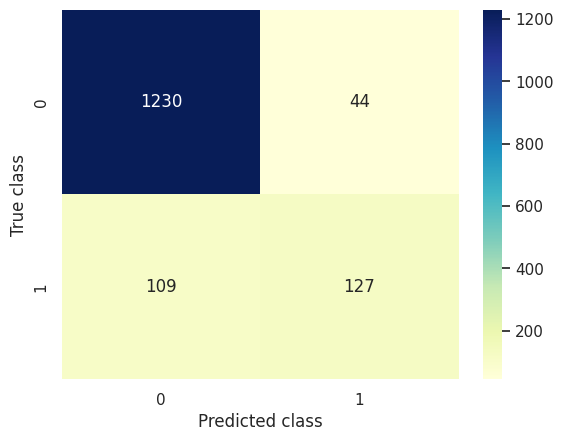

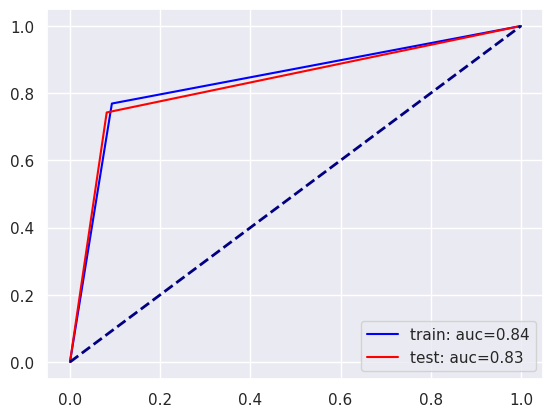

In [35]:
modelLR = LogisticRegression()
print('* Logistic regression * \n')
fit_evaluate(modelLR, X_train, X_test, y_train, y_test)

* Random Forest Classifier * 

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1274
           1       0.92      0.69      0.78       236

    accuracy                           0.94      1510
   macro avg       0.93      0.84      0.88      1510
weighted avg       0.94      0.94      0.94      1510


Confusion Matrix: 



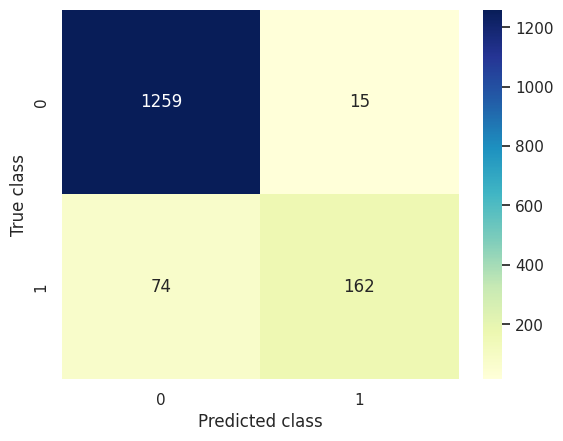

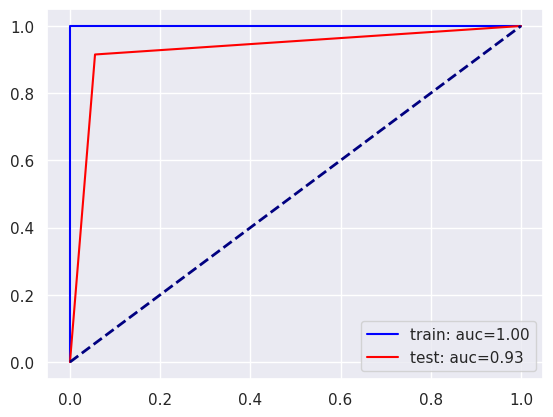

In [36]:
modelRF = RandomForestClassifier()
print('* Random Forest Classifier * \n')
fit_evaluate(modelRF, X_train, X_test, y_train, y_test)

* K Nearest Neighbors Classifier * 

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1274
           1       0.56      0.39      0.46       236

    accuracy                           0.86      1510
   macro avg       0.73      0.67      0.69      1510
weighted avg       0.84      0.86      0.85      1510


Confusion Matrix: 



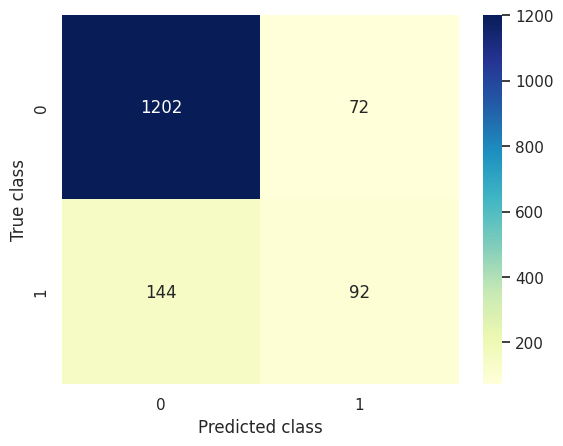

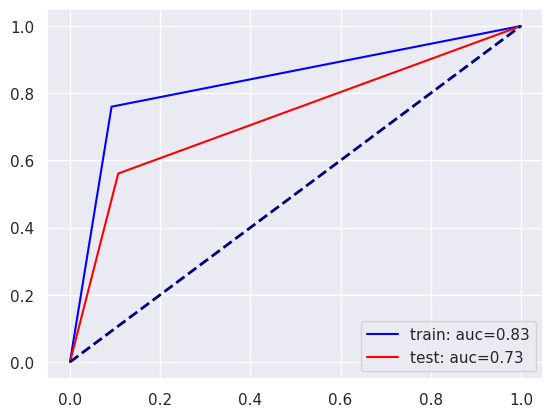

In [37]:
modelKNN = KNeighborsClassifier()
print('* K Nearest Neighbors Classifier * \n')
fit_evaluate(modelKNN, X_train, X_test, y_train, y_test)

SMOTE

In [38]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)

sm.fit(X_train, y_train)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

* SMOTE and Logistic regression * 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1274
           1       0.55      0.66      0.60       236

    accuracy                           0.86      1510
   macro avg       0.74      0.78      0.76      1510
weighted avg       0.87      0.86      0.87      1510


Confusion Matrix: 



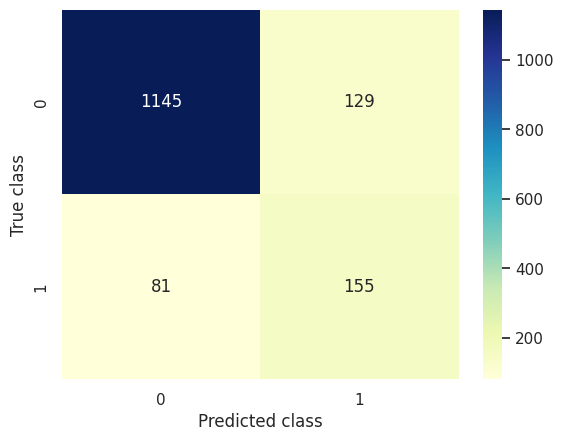

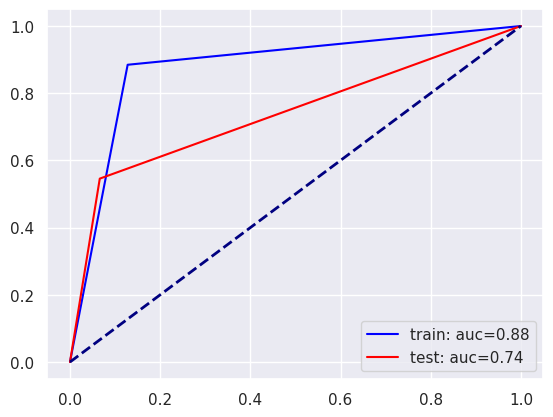

In [39]:
modelLR = LogisticRegression()
print('* SMOTE and Logistic regression * \n')
fit_evaluate(modelLR, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

* SMOTE and Random Forest Classifier * 

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1274
           1       0.83      0.67      0.74       236

    accuracy                           0.93      1510
   macro avg       0.89      0.82      0.85      1510
weighted avg       0.92      0.93      0.92      1510


Confusion Matrix: 



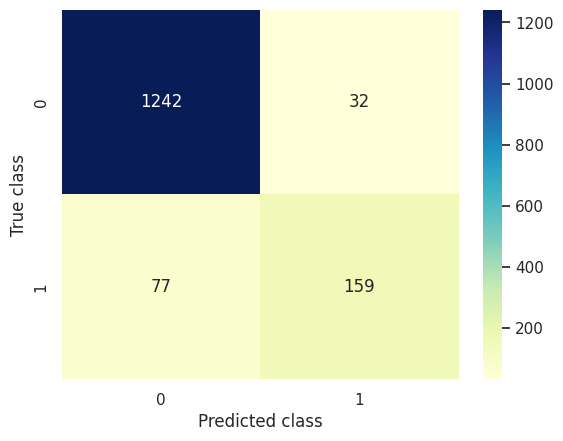

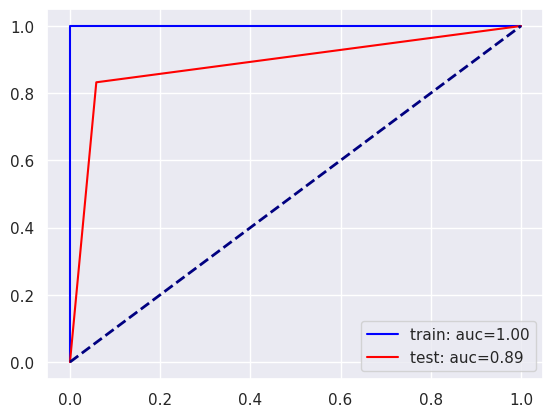

In [40]:
modelRF = RandomForestClassifier()
print('* SMOTE and Random Forest Classifier * \n')
fit_evaluate(modelRF, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

* SMOTE and K Nearest Neighbors Classifier * 

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1274
           1       0.43      0.84      0.57       236

    accuracy                           0.80      1510
   macro avg       0.70      0.82      0.72      1510
weighted avg       0.88      0.80      0.83      1510


Confusion Matrix: 



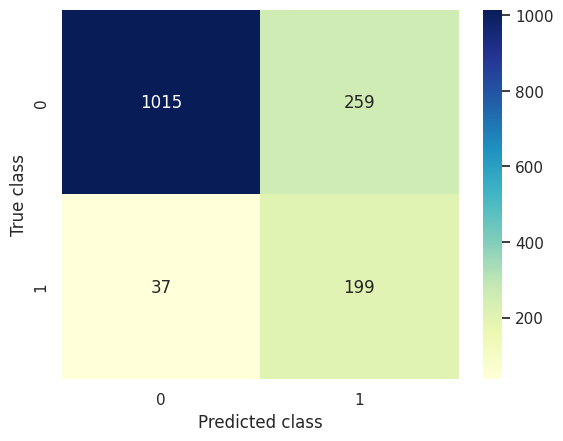

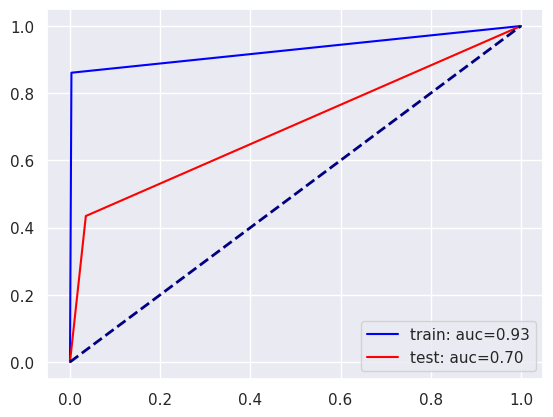

In [41]:
modelKNN = KNeighborsClassifier()
print('* SMOTE and K Nearest Neighbors Classifier * \n')
fit_evaluate(modelKNN, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

Oversampling

In [42]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

Undersampling

In [43]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
rus.fit(X_train, y_train)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

XGBoost

* XGBoost Classifier * 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1274
           1       0.92      0.78      0.85       236

    accuracy                           0.96      1510
   macro avg       0.94      0.88      0.91      1510
weighted avg       0.95      0.96      0.95      1510


Confusion Matrix: 



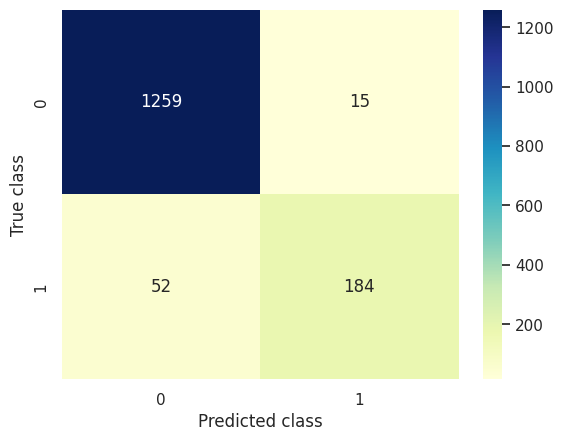

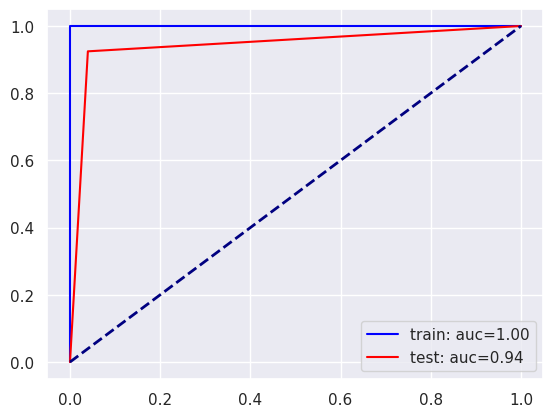

In [44]:
import xgboost as xgb

modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
print('* XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_train, X_test, y_train, y_test)

XGBoost - Hyperparameter Tuning

In [45]:
## building pipeline for hyperparameter tuning

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

# Create a pipeline
pipe = Pipeline([
  ('fs', SelectKBest()),
  ('clf', xgb.XGBClassifier(objective='binary:logistic', scale_pos_weight=9))
])

In [46]:
## hyper parameter tuning - grid search

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
# Define our search space for grid search
search_space = [
  {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.01, 0.1],
    'clf__max_depth': range(2, 4),
    'clf__colsample_bytree': [i/10.0 for i in range(2, 5)],
    'clf__gamma': [i/10.0 for i in range(3)],
    'fs__score_func': [chi2],
    'fs__k': [2],
  }
]
# Define cross validation
kfold = KFold(n_splits=5)
# AUC and accuracy as score
scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score), 'F1 score': 'f1_micro'}
# Define grid search
grid = GridSearchCV(
  pipe,
  param_grid=search_space,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)

# Fit grid search
xgb_model_clv_GS = grid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [47]:
print(xgb_model_clv_GS.best_params_)

{'clf__colsample_bytree': 0.2, 'clf__gamma': 0.1, 'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 100, 'fs__k': 2, 'fs__score_func': <function chi2 at 0x78eb088b25f0>}


* XGBoost Classifier * 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1274
           1       1.00      0.12      0.21       236

    accuracy                           0.86      1510
   macro avg       0.93      0.56      0.57      1510
weighted avg       0.88      0.86      0.81      1510


Confusion Matrix: 



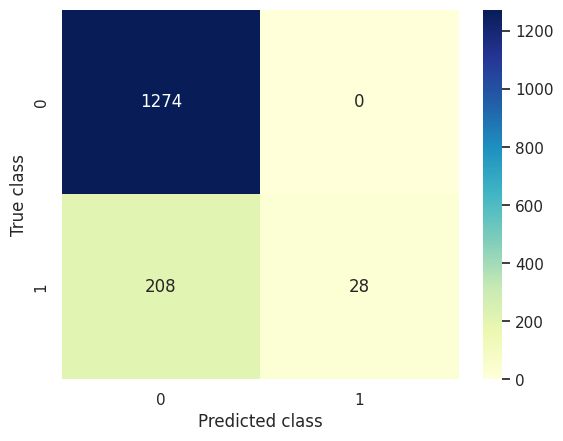

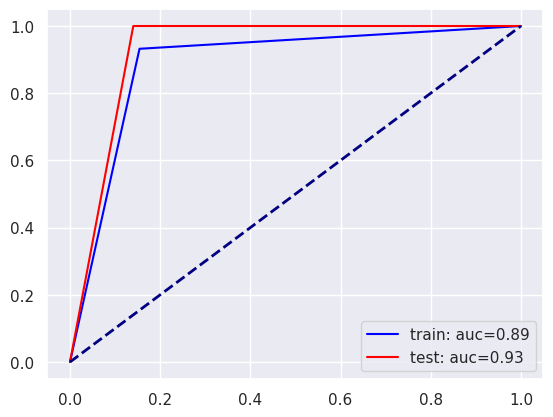

In [48]:
modelXGB = xgb.XGBClassifier(
 learning_rate =0.01,
 n_estimators=100,
 max_depth=2,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.4,
 objective= 'binary:logistic',
 eval_metric="auc")
print('* XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_train, X_test, y_train, y_test)